# Radiation Data Analysis

Name: Yashashwini Gupta
Net ID: yg1568

Name: Udita Gupta
Net ID: ung200

Name: Hitarthi Shah
Net ID: hus206

Name: Mohammed Ilyas Habeeb
Net ID: mih278

## Part 1 - Data Cleaning and Visualization

Let us import all the necessary packages required at one go.

In [13]:
import sys
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install geopy
!{sys.executable} -m pip install cufflinks
!{sys.executable} -m pip install pycountry

    100% |████████████████████████████████| 9.2MB 77kB/s  eta 0:00:01    45% |██████████████▌                 | 4.2MB 11.1MB/s eta 0:00:01    57% |██████████████████▌             | 5.3MB 12.7MB/s eta 0:00:01
  Running setup.py bdist_wheel for pycountry ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/95/45/76/aa36bb308428b450eb1f51955b0f26911f00df3c85602c1da8
Successfully built pycountry


In [2]:
import matplotlib.cm as cm
import matplotlib as mpl
from geopy.geocoders import Nominatim
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode

In [3]:
import pyspark
from pyspark.sql import SQLContext
import pyspark.sql.functions
from pyspark.sql.functions import avg
import time

In [4]:
import plotly.figure_factory as ff
import plotly.graph_objs as go
import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#Setting Spark Context
sc = pyspark.SparkContext('local[*]')
sqlContext=SQLContext(sc)

In [7]:
#Seeing the current directory
!ls

Big Data Project Work- Radiation
Big Data Project Work- Radiation.zip
Calling All DockerCon 2018 Speakers + Attendees.eml
cleaned_measures.csv
Emissions Data.csv
energy-pop-exposure-nuclear-plants-locations-and-country-aggregates.pdf
energy-pop-exposure-nuclear-plants-locations_plants.csv
energy-pop-exposure-nuclear-plants-locations_plants.dbf
energy-pop-exposure-nuclear-plants-locations_plants.prj
energy-pop-exposure-nuclear-plants-locations_plants.sbn
energy-pop-exposure-nuclear-plants-locations_plants.sbx
energy-pop-exposure-nuclear-plants-locations_plants.shp
energy-pop-exposure-nuclear-plants-locations_plants.shx
energy-pop-exposure-nuclear-plants-locations_reactors.csv
energy-pop-exposure-nuclear-plants-locations_reactors.dbf
energy-pop-exposure-nuclear-plants-locations_reactors.prj
energy-pop-exposure-nuclear-plants-locations_reactors.sbn
energy-pop-exposure-nuclear-plants-locations_reactors.sbx
energy-pop-exposure-nuclear-plants-locations_reactors.shp
energy-pop-exposure-nuclea

In [8]:
#Loading all the Necessary datasets
df_pop = sqlContext.read.format("com.databricks.spark.csv") \
        .options(header = "true", inferschema = "true") \
        .load("energy-pop-exposure-nuclear-plants-locations_plants.csv")
df_reactors = sqlContext.read.format("com.databricks.spark.csv") \
            .options(header = "true", inferschema = "true") \
            .load("energy-pop-exposure-nuclear-plants-locations_reactors.csv")
df_measurements = sqlContext.read.format("com.databricks.spark.csv") \
        .options(header = "true", inferschema = "true") \
        .load("measurements.csv")

In [9]:
#Registering the dataset as a SQL Table
df_reactors.registerTempTable("reactors")

In [10]:
#Checking the schema of our dataset
df_reactors.printSchema()

root
 |-- FID: integer (nullable = true)
 |-- Region: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Reactor: string (nullable = true)
 |-- Plant: string (nullable = true)
 |-- Plant_Loc: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Status: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Start_Date: string (nullable = true)
 |-- Year_Built: integer (nullable = true)
 |-- Grid_Date: string (nullable = true)
 |-- Shutdown: string (nullable = true)
 |-- Wikipedia: string (nullable = true)
 |-- Photo: string (nullable = true)
 |-- PhotoCred: string (nullable = true)
 |-- NumReactor: integer (nullable = true)
 |-- Ref_2012: integer (nullable = true)
 |-- Totalpower: integer (nullable = true)
 |-- Ref_2011: integer (nullable = true)
 |-- Ref_2010: double (nullable = true)
 |-- Ref_2009: double (nullable = true)
 |-- Ref_2008: double (nullable = true)
 |-- Ref_2007: double (nullable = tru

In [11]:
#Querying to get the total power generated country-wise

df_total_power = sqlContext.sql("SELECT Country, SUM(Totalpower) as total_power FROM reactors GROUP BY Country ORDER BY Country").toPandas()
df_total_power.head()

Country  total_power
0  ARGENTINA         2654
1    ARMENIA          375
2    BELGIUM        20692
3     BRAZIL         9387
4   BULGARIA         7624

In [14]:
#Importing pycountry package to get the country codes

import pycountry as pc

In [15]:
country_dict= {}

for country in pc.countries:
    country_dict[country.name.upper()] = country.alpha_3

In [16]:
df_total_power['Code'] = df_total_power['Country'].apply(lambda x : country_dict.get(x))

In [17]:
#Country Codes for all the Countries

df_total_power.head()

Country  total_power Code
0  ARGENTINA         2654  ARG
1    ARMENIA          375  ARM
2    BELGIUM        20692  BEL
3     BRAZIL         9387  BRA
4   BULGARIA         7624  BGR

In [18]:
#Constructing a choropleth map

data = dict(
        type = 'choropleth',
        locations = df_total_power['Code'],
        z = df_total_power['total_power'],
        text = df_total_power['Country'],
        colorbar = {'title' : 'Power Generated'},
      ) 


In [19]:
layout = dict(
    title = 'Power Generated',
    geo = dict(
        showframe = False,
        projection = {'type':'Mercator'}
    )
)

In [20]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

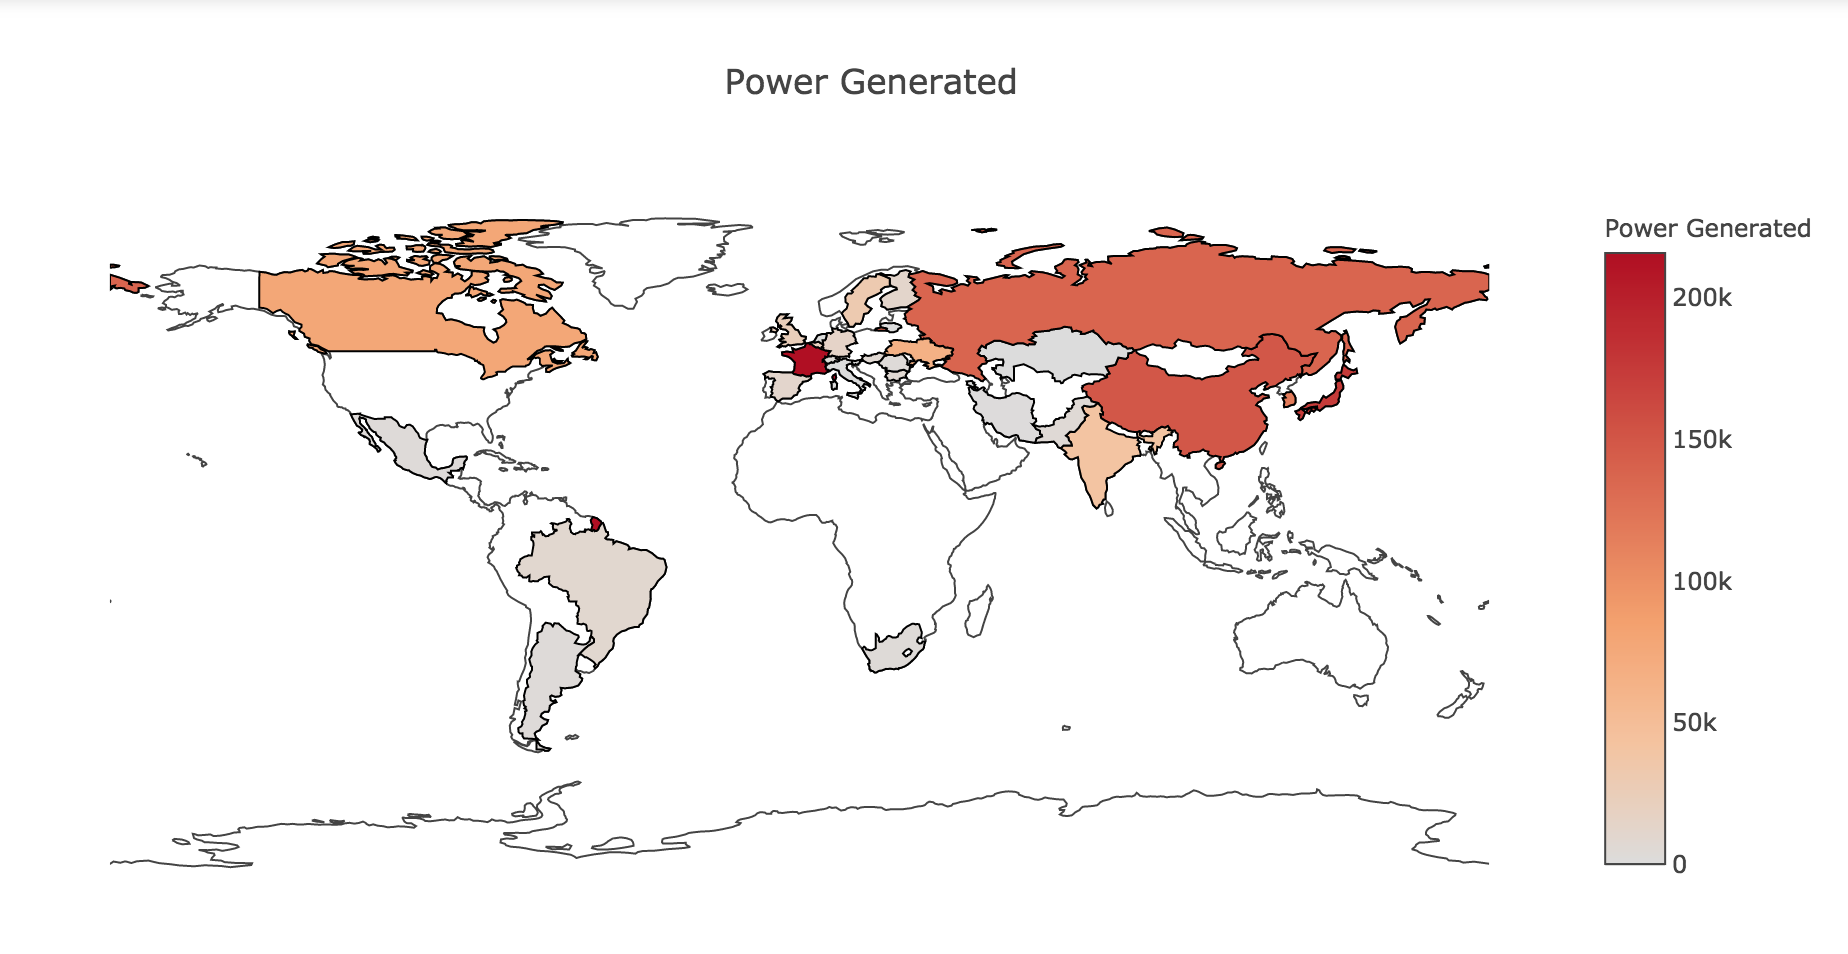

In [21]:
#The above image may not be getting displayed. This happens with plotly.
#We took a screenshot of the above output and saved it as an image
#We will importing it here

from IPython.display import Image
Image('choropleth_fig.png')

We can observe from the above map that Russia and China are the leading nuclear power generators

In [22]:
df_reactor_count = pd.DataFrame(df_reactors[['Status']].toPandas()['Status'].value_counts())
df_reactor_count['label'] = df_reactor_count.index
#Status of Reactors

In [23]:
#Constructing a Pie-Chart to see the total type of reactors

df_reactor_count.iplot(kind='pie',labels='label',values='Status', title = 'Status of Reactors')

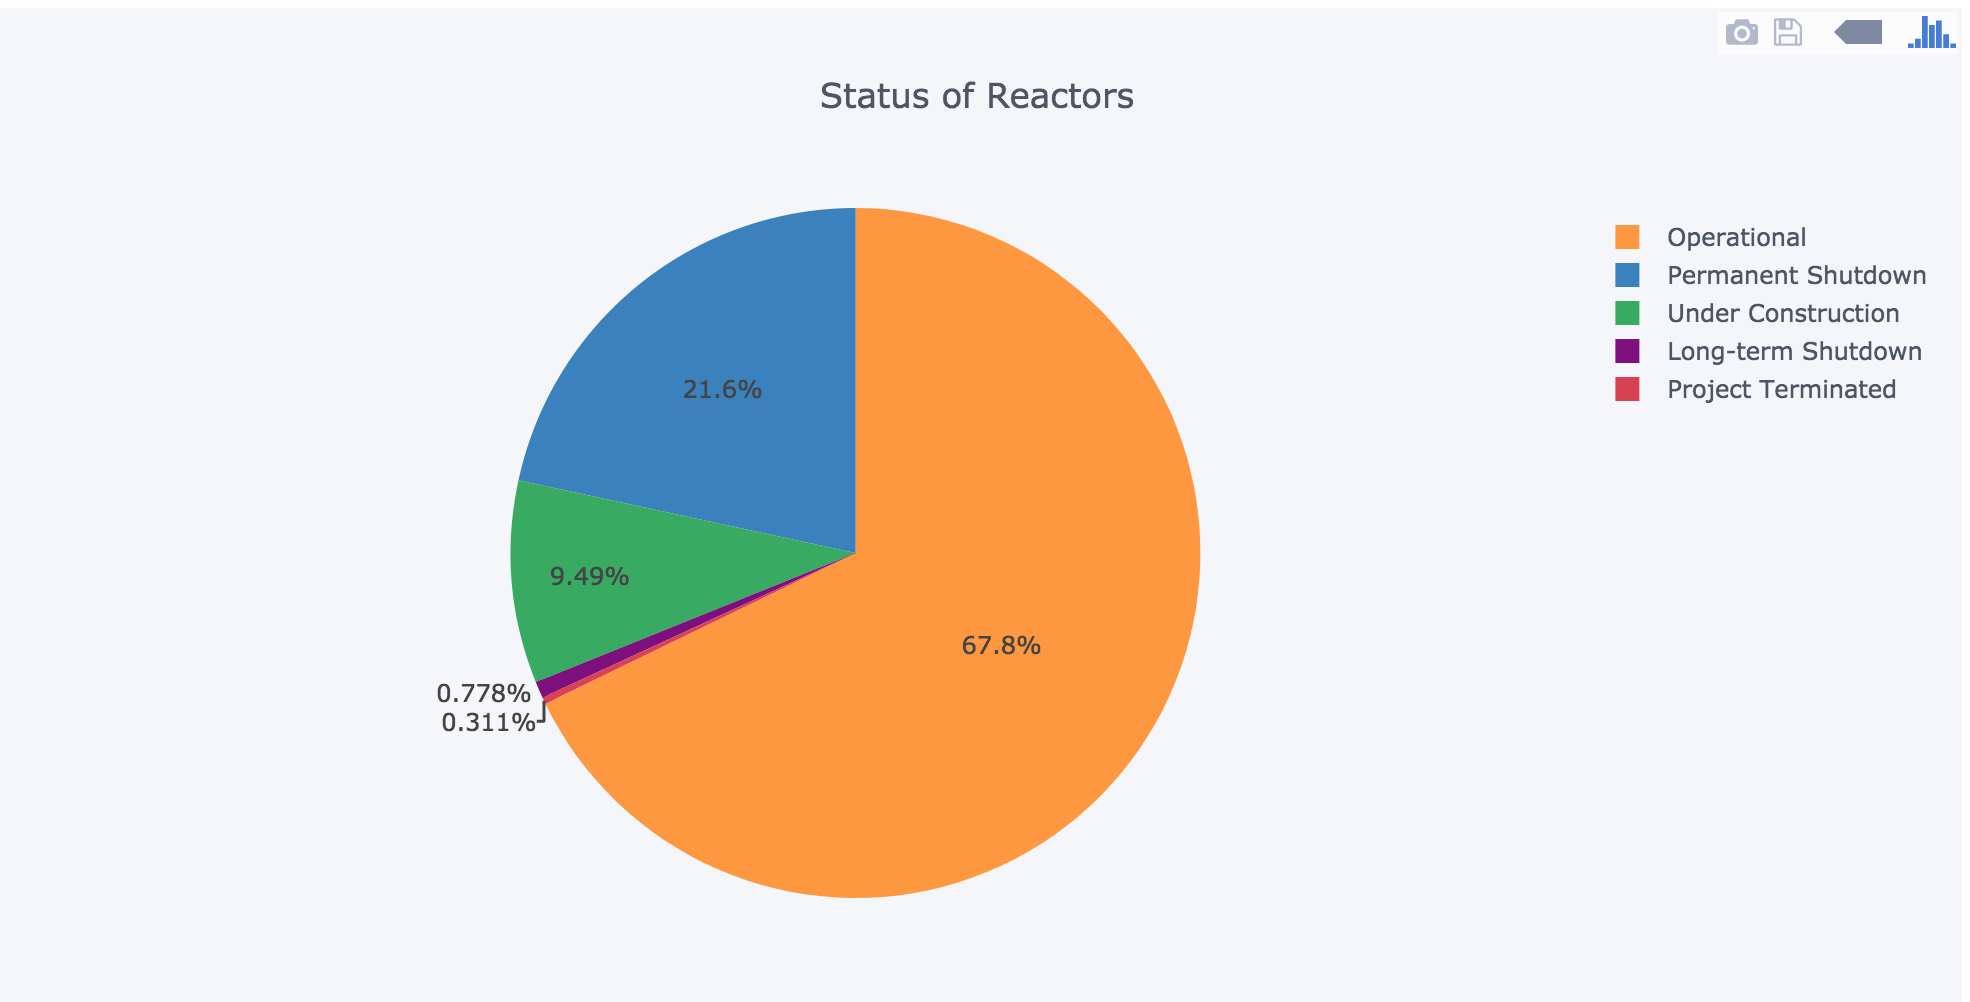

In [24]:
Image('piechart.png')

We can observe from the pie-chart that most of the nuclear reactors are operational. It is also interesting to note that 1/4th of the total number of reactors have permanently shut down.

In [25]:
#Plotting the number of reactors per year

df_reactors[['Year_Built']].toPandas()['Year_Built'].value_counts().sort_index().iplot(title = 'Number of reactors built per year')

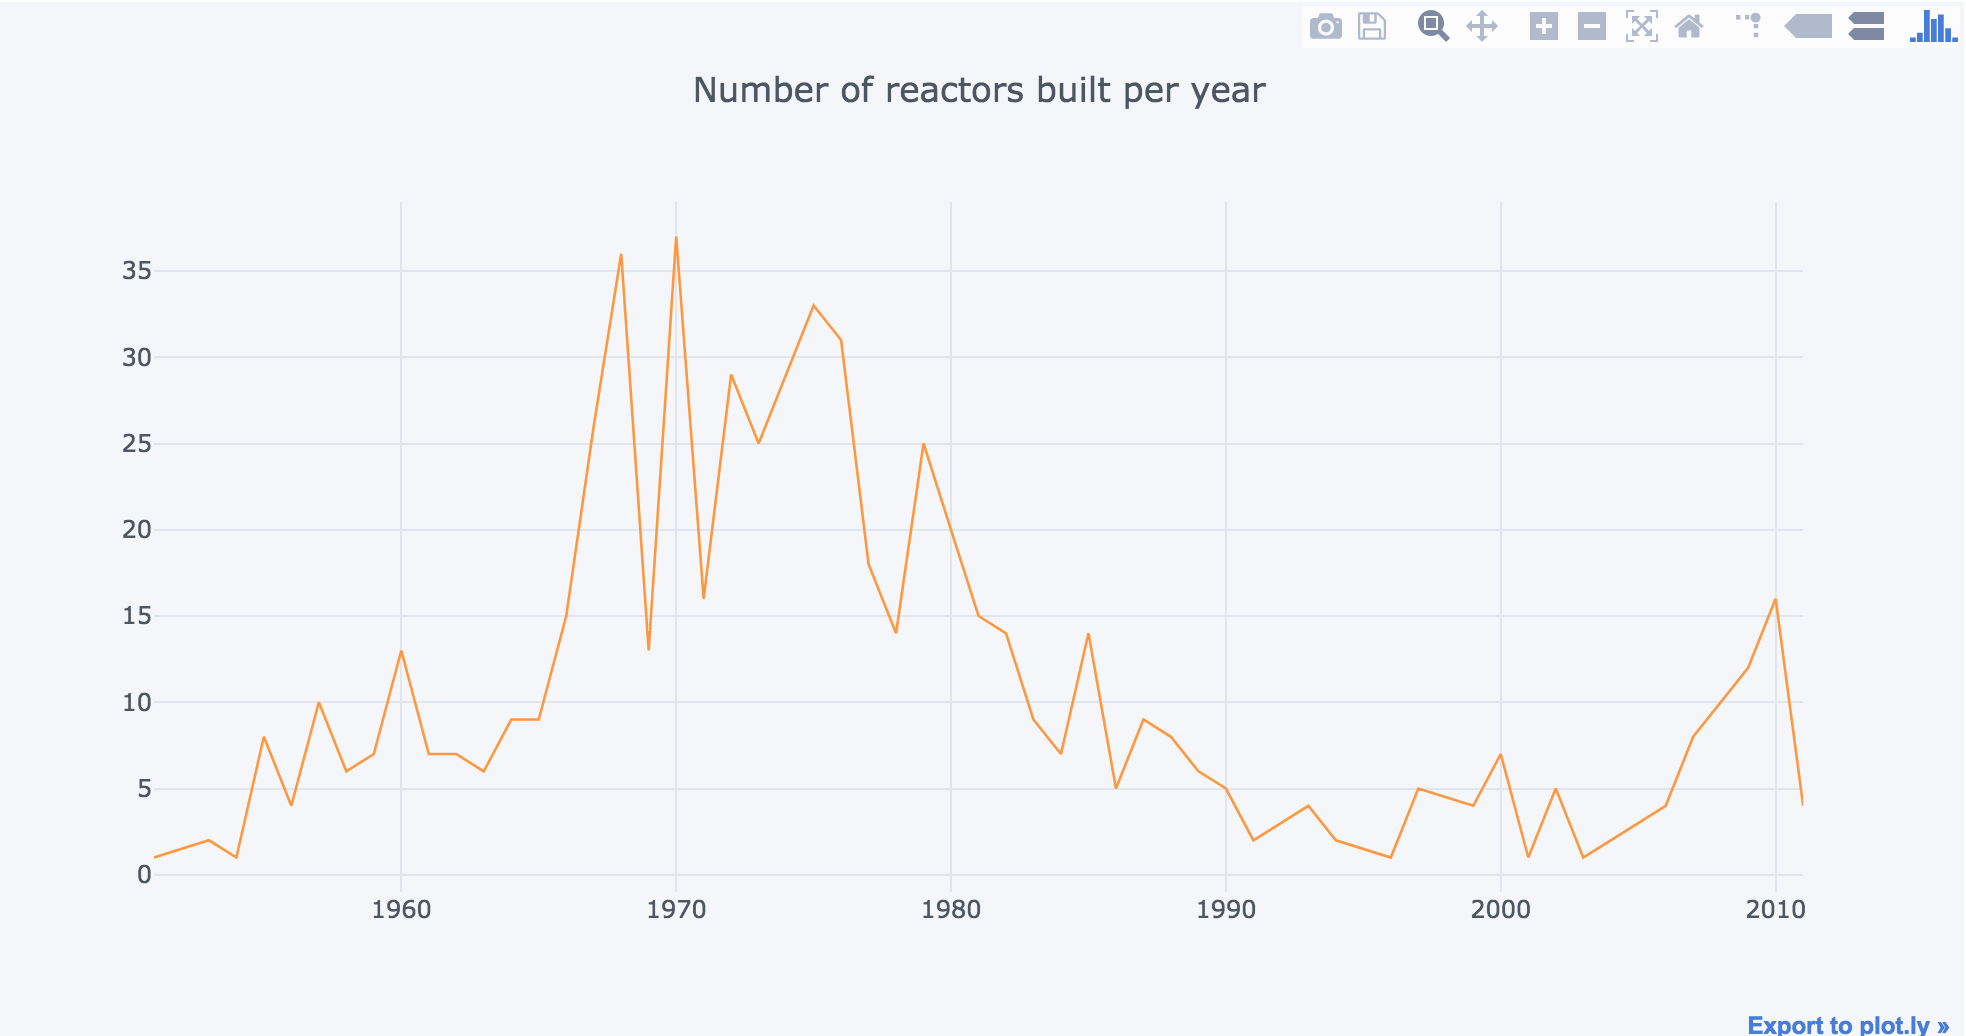

In [26]:
Image('no_of_reactors.png')

In [27]:
#Finding the total number of power generated per year all over the world

output_names = [name for name in df_reactors.columns if (name[0:3] == "Ref")]

df_ref = df_reactors.select(output_names).toPandas()
df_ref.head()

newCol = []
for col in df_ref.columns:
    newCol.append(int(col[4:]))
    
df_ref.columns = newCol
df_ref.sum().sort_index().iplot(title = 'Power Generated per year all over the world')

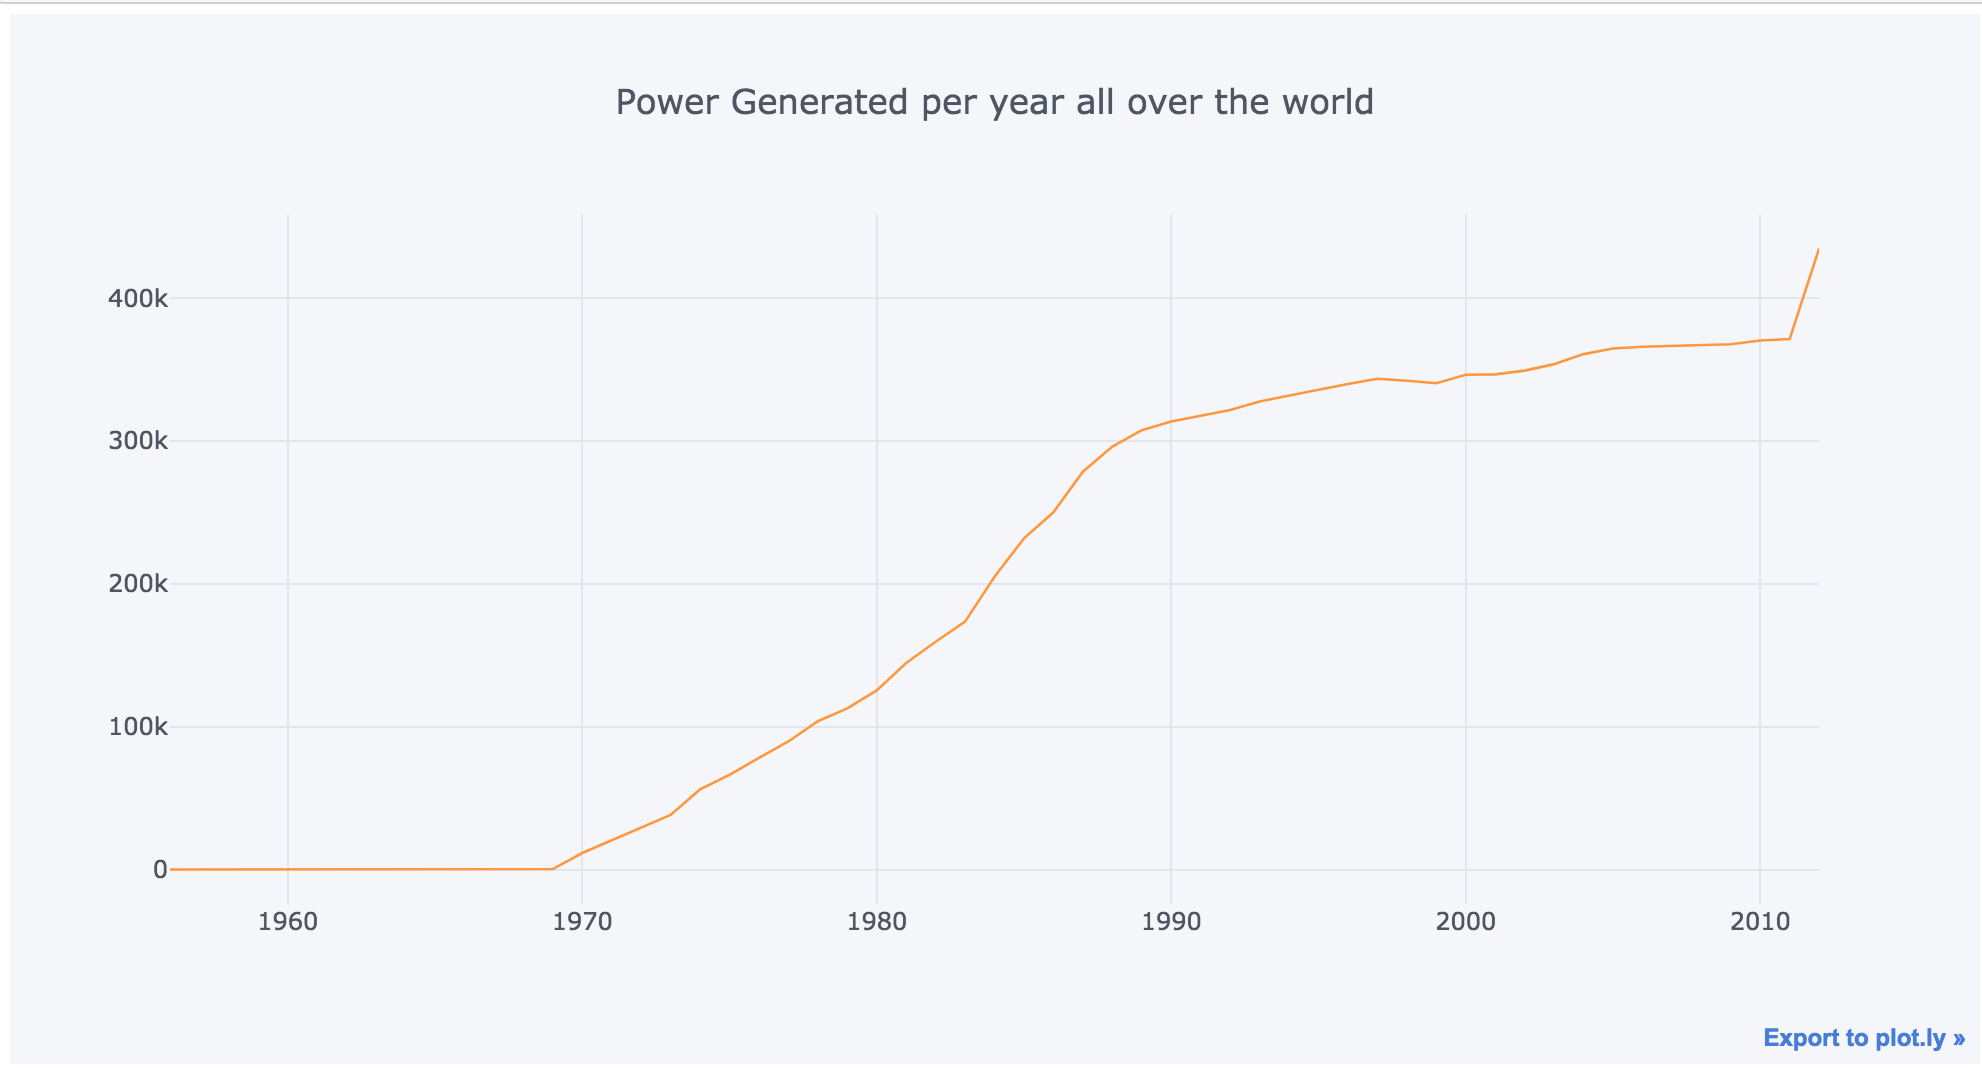

In [28]:
Image('total_pow_gen.png')

We see that there is a steep increase in the power generated during 1980's and it slowed down between 2000-2010, and again a sharp increase after 2010. Interesting.

In [29]:
output_names.append('Country')
df_ref_with_country = df_reactors.select(output_names).toPandas()

In [30]:
df_ref_with_country.head()

Ref_2012  Ref_2011  Ref_2010  Ref_2009  Ref_2008  Ref_2007  Ref_2006  \
0       930       930     900.0     900.0     900.0     900.0       900   
1       900       900     900.0     900.0     900.0     900.0       900   
2       335       335     335.0     335.0     335.0     335.0       335   
3       692         0       0.0       0.0       0.0       0.0         0   
4       600       600     600.0     600.0     600.0     600.0       600   

   Ref_2005  Ref_2004  Ref_2003      ...       Ref_1964  Ref_1963  Ref_1962  \
0     900.0     900.0     900.0      ...              0         0         0   
1     900.0     900.0     900.0      ...              0         0         0   
2     335.0     335.0     335.0      ...              0         0         0   
3       0.0       0.0       0.0      ...              0         0         0   
4     600.0     600.0     600.0      ...              0         0         0   

   Ref_1961  Ref_1960  Ref_1959  Ref_1958  Ref_1957  Ref_1956       Country  
0         0         0         0         0         0         0  SOUTH AFRICA  
1         0         0         0         0         0         0  SOUTH AFRICA  
2         0         0         0         0         0         0     ARGENTINA  
3         0         0         0         0         0         0     ARGENTINA  
4         0         0         0         0         0         0     ARGENTINA  

[5 rows x 58 columns]

In [31]:
df_ref_with_country = df_ref_with_country.groupby('Country').sum().T

In [32]:
#Plotting power generated country-wise
newIndex = []
for index in df_ref_with_country.index:
    newIndex.append(int(index[4:]))
    
df_ref_with_country.index = newIndex

df_ref_with_country = df_ref_with_country.sort_index(ascending=True)

In [33]:
df_ref_with_country.iplot(title = 'Power Generated Country-wise')

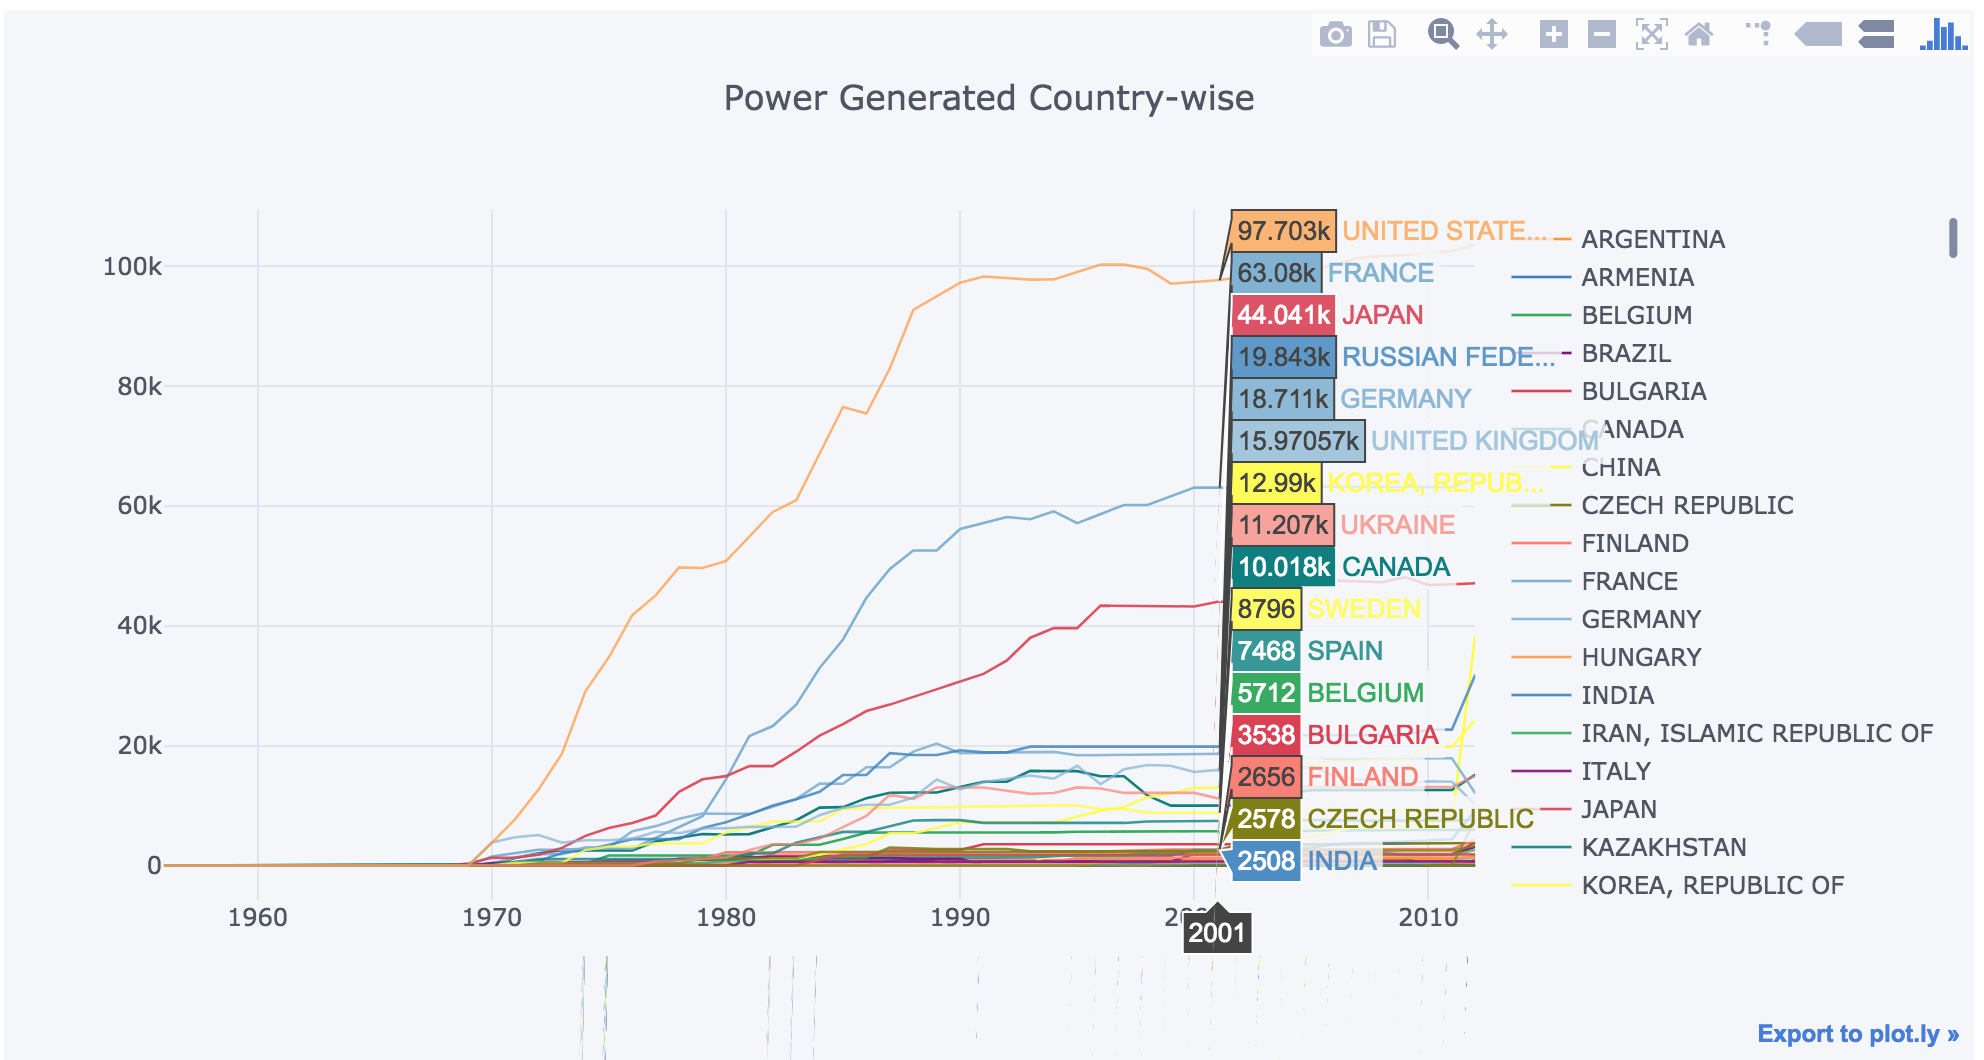

In [35]:
Image('pow_gen_country.png')

We see that United States has the most number of power generated over all the time. That's unsurprising considering how United States is obsessed with nuclear power. What's shocking is that Russia is number 4th on the list, and not number 2nd.

In [36]:
from pyspark.sql.functions import *

df_pop.registerTempTable("plants_pop")

x = sqlContext.sql("select Country, sum(NumReactor) AS NumReactor from plants_pop group by Country")

x.show()

+--------------------+----------+
|             Country|NumReactor|
+--------------------+----------+
|        SOUTH AFRICA|         2|
|             ARMENIA|         2|
|               JAPAN|        62|
|  RUSSIAN FEDERATION|        48|
|IRAN, ISLAMIC REP...|         1|
|           LITHUANIA|         2|
|      UNITED KINGDOM|        45|
|      CZECH REPUBLIC|         6|
|              CANADA|        25|
|              MEXICO|         2|
|            PAKISTAN|         5|
|              FRANCE|        71|
|       TAIWAN, CHINA|         8|
|UNITED STATES OF ...|       134|
|               CHINA|        42|
|  KOREA, REPUBLIC OF|        26|
|            BULGARIA|         8|
|         SWITZERLAND|         6|
|           ARGENTINA|         3|
|          KAZAKHSTAN|         1|
+--------------------+----------+
only showing top 20 rows



In [37]:
pandas_data= x.toPandas()

In [38]:
pandas_data.head()

Country  NumReactor
0               SOUTH AFRICA           2
1                    ARMENIA           2
2                      JAPAN          62
3         RUSSIAN FEDERATION          48
4  IRAN, ISLAMIC REPUBLIC OF           1

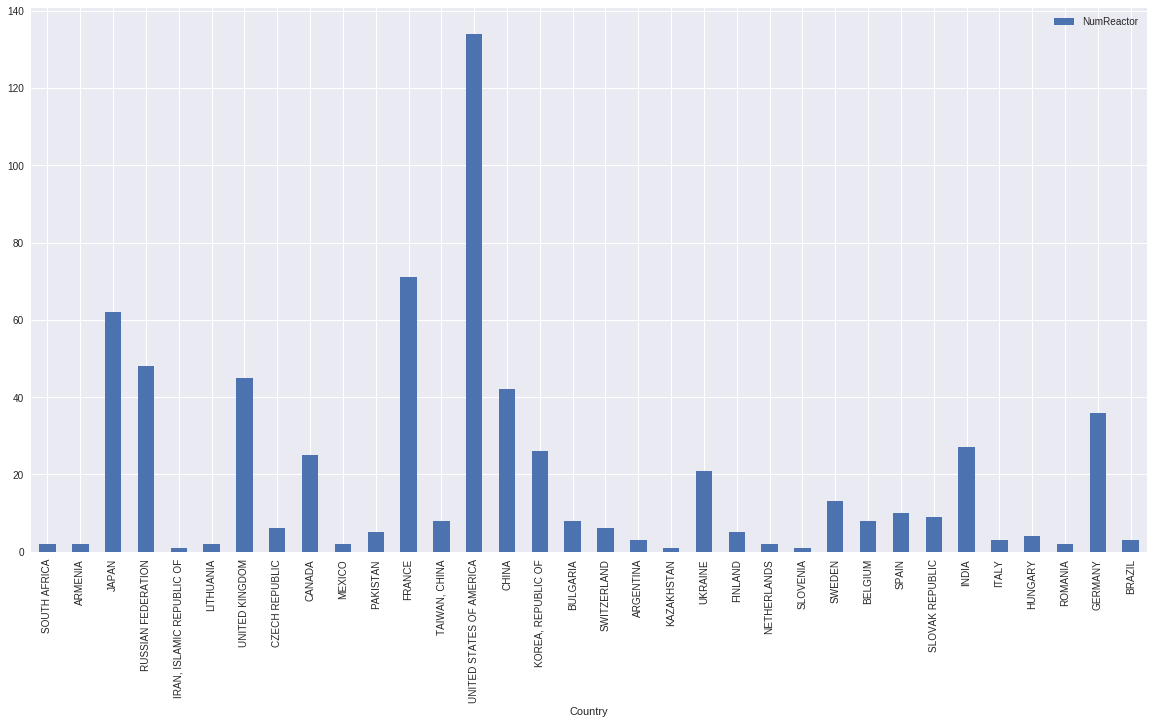

In [39]:
pandas_data.plot(x='Country',y='NumReactor', kind='bar', figsize=(20,10), sort_columns=True)
plt.show()

In [40]:
lat_long = sqlContext.sql('select Region, Country, NumReactor, \
                            Plant, NumReactor, Latitude, Longitude from plants_pop')

In [41]:
lat_long_pandas = lat_long.toPandas()

lat_long_pandas.head()

Region                   Country  NumReactor         Plant  \
0    Europe - Western                    SWEDEN           1        AGESTA   
1    Europe - Western                     SPAIN           2       ALMARAZ   
2     America - Latin                    BRAZIL           3         ANGRA   
3  America - Northern  UNITED STATES OF AMERICA           2  ARKANSAS ONE   
4    Europe - Western                     SPAIN           2          ASCO   

   NumReactor   Latitude  Longitude  
0           1  59.206022  18.082872  
1           2  39.808100  -5.696940  
2           3 -23.007857 -44.458098  
3           2  35.310320 -93.231289  
4           2  41.200000   0.566670

In [42]:
lat_list = lat_long_pandas.Latitude.tolist()
long_list = lat_long_pandas.Longitude.tolist()

In [43]:
data = [ dict(
        type = 'scattergeo' ,
        lat = lat_list,
        lon = long_list,
        mode = 'markers',
        )]

layout = dict(
    title = 'Reactor Locations',
    )

plotly.offline.init_notebook_mode(connected = True)
fig = dict( data = data, layout = layout)
plotly.offline.iplot(fig)

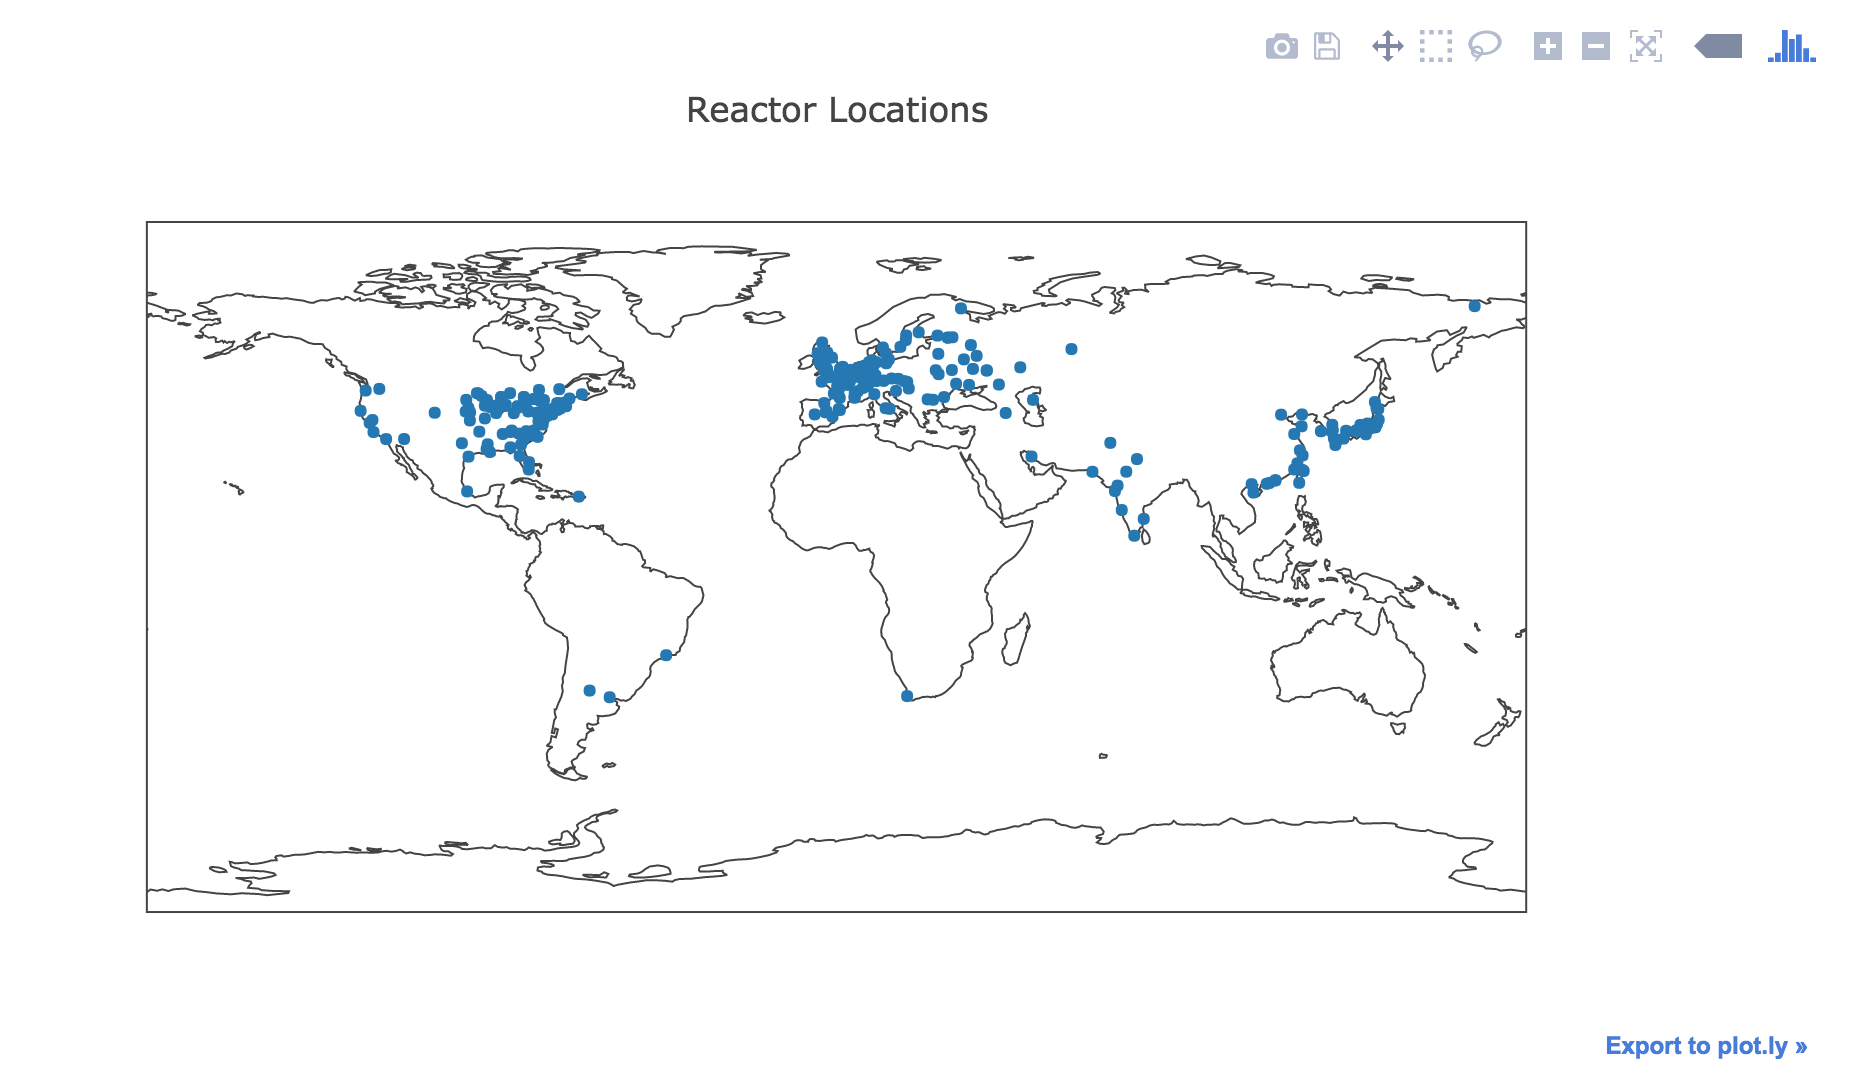

In [44]:
Image('reactor_locs.png')

In [45]:
#Cleaning the measurements data
df_measurements=df_measurements.withColumn("Unit", regexp_replace(col("Unit"), "uSv/hr", "usv"))
df_measurements=df_measurements.withColumn("Unit", regexp_replace(col("Unit"), "uSv/h", "usv"))
df_measurements=df_measurements.withColumn("Unit", regexp_replace(col("Unit"), "usv/hr", "usv"))
df_measurements=df_measurements.withColumn("Unit", regexp_replace(col("Unit"), "uSv", "usv"))
df_measurements=df_measurements.withColumn("Unit", regexp_replace(col("Unit"), "CPM", "cpm"))
df_measurements=df_measurements.withColumn("Unit", regexp_replace(col("Unit"), " cpm", "cpm"))
df_measurements=df_measurements.withColumn("Unit", regexp_replace(col("Unit"), "Cpm", "cpm"))
df_measurements=df_measurements.withColumn("Unit", regexp_replace(col("Unit"), "cpm ", "cpm"))
df_measurements=df_measurements.withColumn("Unit", regexp_replace(col("Unit"), "microsievert", "usv"))


df_ms=df_measurements.where((col("Unit") == "cpm") | (col("Unit") == "usv"))
df_ms= df_measurements.withColumn("Longitude", df_measurements["Longitude"].cast("double"))


df_ms=df_ms.select("Captured Time","Latitude","Longitude","Value","Unit")
df_ms=df_ms.withColumnRenamed('Captured Time', 'time')

df_ms.printSchema()

# df_ms.where("Unit=='usv'").show(100)

root
 |-- time: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Value: double (nullable = true)
 |-- Unit: string (nullable = true)



In [47]:
df_ms.show(100)

+--------------------+---------------+-----------------+------+-------+
|                time|       Latitude|        Longitude| Value|   Unit|
+--------------------+---------------+-----------------+------+-------+
| 2020-02-03 17:00:00|37.507551666667|        139.94117|  72.0|    cpm|
| 2020-02-03 11:00:00|      37.505445|0.016666666666667|  68.0|    cpm|
| 2020-02-03 11:00:00|       37.50725|           139.94|  55.0|    cpm|
| 2020-02-01 03:00:00|34.066486666667| -118.89521666667|  50.0|    cpm|
| 2020-02-01 01:00:00|37.673233333333|  140.06666666667|  48.0|    cpm|
| 2020-02-01 01:00:00|37.674781666667|       140.079895|  52.0|    cpm|
| 2020-01-12 19:00:00|37.737123333333|  140.72685333333| 454.0|    cpm|
| 2020-01-12 19:00:00|37.517901666667|  139.92547833333|  59.0|    cpm|
| 2020-01-12 19:00:00|       37.75588|  140.70341166667| 463.0|    cpm|
| 2020-01-12 19:00:00|       37.53961|  140.11657666667|  47.0|    cpm|
| 2020-01-12 19:00:00|37.737156666667|  140.72683166667| 441.0| 

In [48]:
#Function to convert usv to cpm (these are radiation units)
#Just maintaining only one unit (standardizing)
def usvtocpm(v):
    return (v*2520/21)

from pyspark.sql.functions import udf
cpm_udf = udf(usvtocpm)

In [49]:
#Applying the above function to standardize the values
df_val=df_ms.withColumn("Value", \
              when(df_ms["Unit"] == 'usv', cpm_udf("Value")).otherwise(df_ms["Value"])).where((col("Unit") == "cpm") | (col("Unit") == "usv"))

In [50]:
#looking at the schema 
df_val.printSchema()

root
 |-- time: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Value: string (nullable = true)
 |-- Unit: string (nullable = true)



In [52]:
df_val.show(100)

+--------------------+---------------+-----------------+------------------+----+
|                time|       Latitude|        Longitude|             Value|Unit|
+--------------------+---------------+-----------------+------------------+----+
| 2020-02-03 17:00:00|37.507551666667|        139.94117|              72.0| cpm|
| 2020-02-03 11:00:00|      37.505445|0.016666666666667|              68.0| cpm|
| 2020-02-03 11:00:00|       37.50725|           139.94|              55.0| cpm|
| 2020-02-01 03:00:00|34.066486666667| -118.89521666667|              50.0| cpm|
| 2020-02-01 01:00:00|37.673233333333|  140.06666666667|              48.0| cpm|
| 2020-02-01 01:00:00|37.674781666667|       140.079895|              52.0| cpm|
| 2020-01-12 19:00:00|37.737123333333|  140.72685333333|             454.0| cpm|
| 2020-01-12 19:00:00|37.517901666667|  139.92547833333|              59.0| cpm|
| 2020-01-12 19:00:00|       37.75588|  140.70341166667|             463.0| cpm|
| 2020-01-12 19:00:00|      

In [53]:
#Converting time which is in String format, to timestamp format


df_val = df_val.withColumn("parsed_time", unix_timestamp("time", "yyyy-MM-dd HH:mm:ss")
    .cast("double")
    .cast("timestamp"))

In [54]:
df_val.show(5)

+-------------------+---------------+-----------------+-----+----+-------------------+
|               time|       Latitude|        Longitude|Value|Unit|        parsed_time|
+-------------------+---------------+-----------------+-----+----+-------------------+
|2020-02-03 17:00:00|37.507551666667|        139.94117| 72.0| cpm|2020-02-03 17:00:00|
|2020-02-03 11:00:00|      37.505445|0.016666666666667| 68.0| cpm|2020-02-03 11:00:00|
|2020-02-03 11:00:00|       37.50725|           139.94| 55.0| cpm|2020-02-03 11:00:00|
|2020-02-01 03:00:00|34.066486666667| -118.89521666667| 50.0| cpm|2020-02-01 03:00:00|
|2020-02-01 01:00:00|37.673233333333|  140.06666666667| 48.0| cpm|2020-02-01 01:00:00|
+-------------------+---------------+-----------------+-----+----+-------------------+
only showing top 5 rows



In [55]:
df_val.printSchema()

root
 |-- time: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Value: string (nullable = true)
 |-- Unit: string (nullable = true)
 |-- parsed_time: timestamp (nullable = true)



In [56]:
#df_val.show()
df_val = df_val.drop('time')

In [57]:
df_val.show()

+---------------+-----------------+-----+----+-------------------+
|       Latitude|        Longitude|Value|Unit|        parsed_time|
+---------------+-----------------+-----+----+-------------------+
|37.507551666667|        139.94117| 72.0| cpm|2020-02-03 17:00:00|
|      37.505445|0.016666666666667| 68.0| cpm|2020-02-03 11:00:00|
|       37.50725|           139.94| 55.0| cpm|2020-02-03 11:00:00|
|34.066486666667| -118.89521666667| 50.0| cpm|2020-02-01 03:00:00|
|37.673233333333|  140.06666666667| 48.0| cpm|2020-02-01 01:00:00|
|37.674781666667|       140.079895| 52.0| cpm|2020-02-01 01:00:00|
|37.737123333333|  140.72685333333|454.0| cpm|2020-01-12 19:00:00|
|37.517901666667|  139.92547833333| 59.0| cpm|2020-01-12 19:00:00|
|       37.75588|  140.70341166667|463.0| cpm|2020-01-12 19:00:00|
|       37.53961|  140.11657666667| 47.0| cpm|2020-01-12 19:00:00|
|37.737156666667|  140.72683166667|441.0| cpm|2020-01-12 19:00:00|
|37.550586666667|           139.95| 44.0| cpm|2020-01-12 19:00

In [59]:
#Getting the individual year and month columns

df_val_yr_month = df_val.select('Latitude', 'Longitude', 'Value', 'Unit',year('parsed_time'), month('parsed_time'))#.alias('year', 'month')
df_val_yr_month.show(100)

+---------------+-----------------+------------------+----+-----------------+------------------+
|       Latitude|        Longitude|             Value|Unit|year(parsed_time)|month(parsed_time)|
+---------------+-----------------+------------------+----+-----------------+------------------+
|37.507551666667|        139.94117|              72.0| cpm|             2020|                 2|
|      37.505445|0.016666666666667|              68.0| cpm|             2020|                 2|
|       37.50725|           139.94|              55.0| cpm|             2020|                 2|
|34.066486666667| -118.89521666667|              50.0| cpm|             2020|                 2|
|37.673233333333|  140.06666666667|              48.0| cpm|             2020|                 2|
|37.674781666667|       140.079895|              52.0| cpm|             2020|                 2|
|37.737123333333|  140.72685333333|             454.0| cpm|             2020|                 1|
|37.517901666667|  139.9254783

In [63]:
from pyspark.sql.functions import desc
#Getting only those rows which are between the years 1969 and 2017
df_val_yr_month = df_val_yr_month.filter((df_val_yr_month['year(parsed_time)'] < 2018) & (df_val_yr_month['year(parsed_time)'] > 1969))

In [64]:
df_val_yr_month.show()

+----------+-----------+------------------+----+-----------------+------------------+
|  Latitude|  Longitude|             Value|Unit|year(parsed_time)|month(parsed_time)|
+----------+-----------+------------------+----+-----------------+------------------+
|   38.3151|  -123.0752|              80.0| cpm|             2017|                11|
|    37.659|    140.459|              19.0| cpm|             2017|                11|
|    37.659|    140.459|              36.0| cpm|             2017|                11|
|   39.4099|   -77.9069|              12.0| cpm|             2017|                11|
| 37.796306| 140.514413|              19.0| cpm|             2017|                11|
|  35.74591|  139.91815|              26.0| cpm|             2017|                11|
|  35.74591|  139.91815|               0.0| cpm|             2017|                11|
|    42.208|    -122.69|              15.0| cpm|             2017|                11|
|    42.208|    -122.69|              46.0| cpm|      

In [65]:
df_val_yr_month.select("year(parsed_time)").distinct().orderBy("year(parsed_time)").show(1000)

+-----------------+
|year(parsed_time)|
+-----------------+
|             1970|
|             1981|
|             1983|
|             2000|
|             2003|
|             2004|
|             2006|
|             2010|
|             2011|
|             2012|
|             2013|
|             2014|
|             2015|
|             2016|
|             2017|
+-----------------+



In [66]:
df_val_yr_month = df_val_yr_month.dropna(subset = ['Latitude', 'Longitude', 'Value', 'year(parsed_time)'])

In [67]:
#Checking if the above code worked properly
df_val_yr_month.where(col("Latitude").isNull()).count()

0

In [70]:
df_val.where(col("Longitude").isNull()).count()

0


In [71]:
df_val.where(col("Unit").isNull()).count()

0


In [72]:
df_val.where(col("year(parsed_time)").isNull()).count()

0


In [73]:
df_val_yr_month.show()

+----------+-----------+------------------+----+-----------------+------------------+
|  Latitude|  Longitude|             Value|Unit|year(parsed_time)|month(parsed_time)|
+----------+-----------+------------------+----+-----------------+------------------+
|   38.3151|  -123.0752|              80.0| cpm|             2017|                11|
|    37.659|    140.459|              19.0| cpm|             2017|                11|
|    37.659|    140.459|              36.0| cpm|             2017|                11|
|   39.4099|   -77.9069|              12.0| cpm|             2017|                11|
| 37.796306| 140.514413|              19.0| cpm|             2017|                11|
|  35.74591|  139.91815|              26.0| cpm|             2017|                11|
|  35.74591|  139.91815|               0.0| cpm|             2017|                11|
|    42.208|    -122.69|              15.0| cpm|             2017|                11|
|    42.208|    -122.69|              46.0| cpm|      

In [74]:
df_val_yr_month.printSchema()

root
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Value: string (nullable = true)
 |-- Unit: string (nullable = true)
 |-- year(parsed_time): integer (nullable = true)
 |-- month(parsed_time): integer (nullable = true)



In [75]:
#We observe that the radiation Value is in String format. Let us change it to the 'Double' format
df_val_yr_month= df_val_yr_month.withColumn("Value", df_val_yr_month["Value"].cast("double"))

In [77]:
#Now to see if the above code worked
df_val_yr_month.printSchema()

root
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Value: double (nullable = true)
 |-- Unit: string (nullable = true)
 |-- year(parsed_time): integer (nullable = true)
 |-- month(parsed_time): integer (nullable = true)



In [78]:
#Saving the cleaned data as a csv file
df_val_yr_month.write.csv('cleaned_measures.csv')

## Part - II Modeling the Data

In [81]:
#Loading the cleaned data
df_all_measure = sqlContext.read.format("com.databricks.spark.csv").option("header", "false").load("measurement_cleaned.csv/*.csv")

In [82]:
df_all_measure.show(20)

+---------------+---------------+----+----+---+
|            _c0|            _c1| _c2| _c3|_c4|
+---------------+---------------+----+----+---+
|       35.65618|139.71390166667|44.0|2011| 12|
|       35.65618|139.71390166667|40.0|2011| 12|
|35.656181666667|139.71390333333|40.0|2011| 12|
|35.656181666667|139.71390333333|39.0|2011| 12|
|35.656181666667|139.71390333333|40.0|2011| 12|
|35.656181666667|     139.713905|44.0|2011| 12|
|35.656181666667|     139.713905|46.0|2011| 12|
|35.656183333333|139.71390666667|43.0|2011| 12|
|35.656183333333|139.71390833333|44.0|2011| 12|
|35.656183333333|139.71390833333|41.0|2011| 12|
|      35.656185|      139.71391|41.0|2011| 12|
|      35.656185|      139.71391|41.0|2011| 12|
|35.656183333333|      139.71391|44.0|2011| 12|
|35.656183333333|139.71390833333|46.0|2011| 12|
|35.656183333333|139.71390833333|45.0|2011| 12|
|35.656183333333|139.71390833333|46.0|2011| 12|
|      35.656185|139.71390833333|41.0|2011| 12|
|      35.656185|139.71390833333|36.0|20

In [83]:
#Looks like our column names got removed. Let us rename them
df_all_measure = df_all_measure.withColumnRenamed("_c0", "Latitude").withColumnRenamed("_c1", "Longitude").withColumnRenamed("_c2", "RadiationLevel").withColumnRenamed("_c3", "Year").withColumnRenamed("_c4", "Month")

df_all_measure.show()

+---------------+---------------+--------------+----+-----+
|       Latitude|      Longitude|RadiationLevel|Year|Month|
+---------------+---------------+--------------+----+-----+
|       35.65618|139.71390166667|          44.0|2011|   12|
|       35.65618|139.71390166667|          40.0|2011|   12|
|35.656181666667|139.71390333333|          40.0|2011|   12|
|35.656181666667|139.71390333333|          39.0|2011|   12|
|35.656181666667|139.71390333333|          40.0|2011|   12|
|35.656181666667|     139.713905|          44.0|2011|   12|
|35.656181666667|     139.713905|          46.0|2011|   12|
|35.656183333333|139.71390666667|          43.0|2011|   12|
|35.656183333333|139.71390833333|          44.0|2011|   12|
|35.656183333333|139.71390833333|          41.0|2011|   12|
|      35.656185|      139.71391|          41.0|2011|   12|
|      35.656185|      139.71391|          41.0|2011|   12|
|35.656183333333|      139.71391|          44.0|2011|   12|
|35.656183333333|139.71390833333|       

In [84]:
#Registering the cleaned data as a SQL Table
df_all_measure.registerTempTable("final_data")

In [86]:
#Querying to get the avg radiation level year and month wise
scaled_df_all_measure = sqlContext.sql("SELECT Year, Month, AVG(RadiationLevel) AS AvgRadiation FROM final_data GROUP BY Year, Month ORDER BY Year, Month")


In [87]:
scaled_df_all_measure.printSchema()

root
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- AvgRadiation: double (nullable = true)



In [88]:
#Converting Year to Int from String type
from pyspark.sql.types import IntegerType

scaled_df_all_measure = scaled_df_all_measure.withColumn("Year", scaled_df_all_measure["Year"].cast(IntegerType()))

scaled_df_all_measure.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Month: string (nullable = true)
 |-- AvgRadiation: double (nullable = true)



In [95]:
#Preliminary steps to build a Linear Model
from pyspark.sql import SparkSession
spark = SparkSession.builder \
   .master("local") \
   .appName("Linear Regression Model") \
   .config("spark.executor.memory", "1gb") \
   .getOrCreate()

# Import `DenseVector`
from pyspark.ml.linalg import DenseVector

# Define the `input_data` 
input_data = scaled_df_all_measure.rdd.map(lambda x: (DenseVector(x[0:]), x[1] ))

# Replace `df` with the new DataFrame
scaled_df_all_measure = spark.createDataFrame(input_data, ["features", "label"])

In [96]:
#Scaling both the features and label so that they lie within the same range

# Import `StandardScaler` 
from pyspark.ml.feature import StandardScaler

# Initialize the `standardScaler`
standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")

# Fit the DataFrame to the scaler
scaler = standardScaler.fit(scaled_df_all_measure)

# Transform the data in `df` with the scaler
scaled_df = scaler.transform(scaled_df_all_measure)

# Inspect the result
scaled_df.take(2)

[Row(features=DenseVector([11.0, 54.0]), label=54.0, features_scaled=DenseVector([0.0234, 0.0335])),
 Row(features=DenseVector([12.0, 45.51]), label=45.51, features_scaled=DenseVector([0.0255, 0.0282]))]

In [97]:
# Randomly splitting the data into train and test sets witht the ratio of 4: 1
#Providing a seed so that every time this code executes, it gives the same random values
train_data, test_data = scaled_df.randomSplit([.8,.2],seed=1234)

In [98]:
# Import `LinearRegression`
from pyspark.ml.regression import LinearRegression

# Defining a Linear Regression model
lr = LinearRegression(labelCol="label", maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the data to the model
linearModel = lr.fit(train_data)

In [99]:
# Generate predictions
predicted = linearModel.transform(test_data)

# Extract the predictions and the "known" correct labels
predictions = predicted.select("prediction").rdd.map(lambda x: x[0])
labels = predicted.select("label").rdd.map(lambda x: x[0])

# Zip `predictions` and `labels` into a list
predictionAndLabel = predictions.zip(labels).collect()

# Print out first 5 instances of `predictionAndLabel` 


[(54.050743186169, 54.0),
 (45.562314593455156, 45.51),
 (100.88424904099037, 100.84217583555254),
 (62.106068477031805, 62.05681652056642),
 (94.05123688105427, 94.007898724751)]

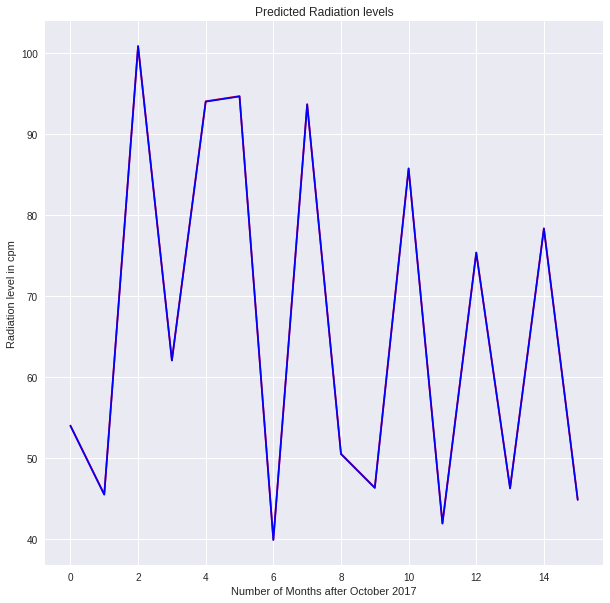

In [109]:
del predictionAndLabel[11]

x_values = [predictionAndLabel[i][0] for i in range(len(predictionAndLabel)-4)]
y_values = [predictionAndLabel[i][1] for i in range(len(predictionAndLabel)-4)]


import matplotlib.pyplot as plt
plt.figure(figsize =(10,10))
plt.plot(x_values,'r')
plt.plot(y_values,'b')
plt.title("Predicted Radiation levels")
plt.xlabel("Number of Months after October 2017")
plt.ylabel("Radiation level in cpm")
plt.show()

In [104]:
#Evaluating the fit of our Linear Regression Model by looking at the root mean squared error
linearModel.summary.rootMeanSquaredError

0.2999942136017143

We observe that our linear regression model has a low mean squared error over a dataset of staggering ~50 million observations. 